## Initial Simulations

A straightforward way to initiate analysis of how the models might differentially handle item repetitions is to measure how the probability of recalling an item given a static contextual cue changes as the item is repeatedly encoded. We expect it to increase linearly (by $x^{\tau}$) with respect to `InstanceCMR`, but exponentially within `CMR`. If this reasoning survives scrutiny, that's a big deal.

Parameters, contextual cue, and repeated item shouldn't matter here. We'll try to set them to values that aren't distracting and vary them to ensure our simulation results aren't contingent on any particular configuration.

In [1]:
#%env NUMBA_DISABLE_JIT 1

from instance_cmr.models import *
from instance_cmr.model_analysis import *
import numpy as np
import matplotlib.pyplot as plt

experiment_count = 1000

ModuleNotFoundError: No module named 'instance_cmr'

### InstanceCMR With Instance-Based Choice Sensitivity

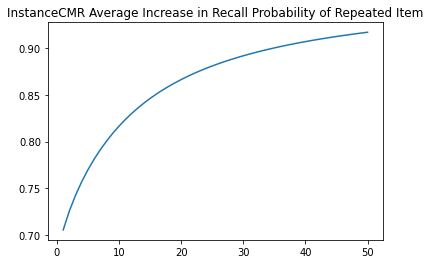

In [11]:
# selected parameters
parameters = {
    'item_count': 20,
    'presentation_count': 70,
    'encoding_drift_rate': 7.50643542e-01,
    'start_drift_rate': 1.42483068e-02,
    'recall_drift_rate': 8.99035619e-01,
    'shared_support': 9.60870298e-04,
    'item_support': 2.30959697e-01,
    'learning_rate': 9.61676960e-02,
    'primacy_scale': 7.80989503e+00,
    'primacy_decay': 6.29317080e+01,
    'stop_probability_scale': 3.44289419e-02,
    'stop_probability_growth': 2.57667853e-01,
    'choice_sensitivity': 1,
    'context_sensitivity': 1.20133645e+00,
    'feature_sensitivity': 1,
}

results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = 0
    #cue = np.concatenate((np.zeros(parameters['item_count']+1), np.random.rand(parameters['item_count']+1)))

    # initialize model
    model = InstanceCMR(**parameters)
    
    model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1))
    results[experiment, 0] = np.nan # model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
        
        if i == 0:
            cue = np.concatenate((np.zeros(parameters['item_count']+1), model.context))
        
        # cue = np.concatenate((np.zeros(parameters['item_count']+1), model.context)) # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]

# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'] + 1, 1)[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.memory, "memory")

plt.plot(np.mean(results, axis=0))
plt.title('InstanceCMR Average Increase in Recall Probability of Repeated Item')
plt.show()

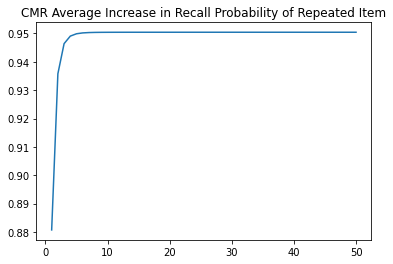

In [12]:
# selected parameters
parameters = {
    'item_count': 20,
    'presentation_count': 70,
    'encoding_drift_rate': 0.54926441,
    'start_drift_rate': 0.12884982,
    'recall_drift_rate': 0.74057096,
    'shared_support': 0.26469486,
    'item_support': 0.18835232,
    'learning_rate': 0.18321188,
    'primacy_scale': 2.88148434,
    'primacy_decay': 30.13008952,
    'stop_probability_scale': 0.04958878,
    'stop_probability_growth': 0.21112143,
    'choice_sensitivity':  5.58388858,
}


results = np.zeros((experiment_count, 1+parameters['presentation_count']-parameters['item_count']))

for experiment in range(experiment_count):
    # arbitrary item and contextual cue
    repeated_item = 0
    #cue = np.random.rand(parameters['item_count'] + 1)

    # initialize model
    model = CMR(**parameters)
    cue = model.context
    model.experience(np.eye(parameters['item_count'], parameters['item_count']))
    results[experiment, 0] = np.nan #model.outcome_probabilities(cue)[repeated_item+1]
    
    # track outcome probability of selected item as it is repeatedly encoded
    for i in range(parameters['presentation_count']-parameters['item_count']):
        
        model.experience(np.eye(parameters['item_count'], parameters['item_count'])[repeated_item:repeated_item+1])
        
        if i == 0:
            cue = model.context
        
        #cue = model.context # for when i want context to be the cue
        results[experiment, i+1] = model.outcome_probabilities(cue)[repeated_item+1]
        
# plot an example trial    
#print('repeated item:\n', repeated_item, np.eye(parameters['item_count'], parameters['item_count'])[repeated_item:repeated_item+1])
#print('cue:\n', cue)
#print('outcome probability for repeated item:\n', results[-1])
#plot_states(model.mcf, "memory")

import matplotlib.pyplot as plt

plt.plot(np.mean(results, axis=0))
plt.title('CMR Average Increase in Recall Probability of Repeated Item')
plt.show()